### Installs and imports

In [1]:
HEAD = '\033[95m'#magenta
OKB = '\033[94m'#blue
OKG = '\033[92m'#green
WARN = '\033[93m'#yellow ochre
FAIL = '\033[91m'#red
ENDC = '\033[0m'#ends an effect. So, use like HEAD+ULINE+"Hello"+ENDC+ENDC
BOLD = '\033[1m'
ULINE = '\033[4m'

import numpy as np
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt

try:
	import spacy
except ImportError :
	print (FAIL+BOLD+"NLP package Spacy is missing. Install spacy using the instructions here: https://spacy.io/usage"+ENDC+ENDC)
	raise ImportError ( "No module named Spacy" )

try:
	nlp = spacy.load("en_core_web_sm")
except  IOError:
	print (FAIL+BOLD+"English model in Spacy is missing. You can download the -en model: python -m spacy download en"+ENDC+ENDC)
	raise  IOError ( "No English language model available within Spacy" )

try:
	from spacy import displacy
except ImportError :
	print (FAIL+BOLD+"DisplaCy is missing. This is availble in Spacy v2.0. Update Spacy."+ENDC+ENDC)

try:
	from pathlib import Path
except ImportError :
	raise ImportError ( "Path not found from pathlib" )

try:
	from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
except ImportError :
	raise ImportError ("No Count vectorizer and TF-IDF vectorizer found in scikit-learn feature extraction module. Install scikit-learn")

#from sklearn.base import TransformerMixin
#from sklearn.pipeline import Pipeline

### Declare two example text strings

In [71]:
TEXT1 = "The world has never been the same since the advent of the internet. However, we are seeing another revolution in the digital world through the advents of AI. What do you think? Do you find AI to be revolutionary?"

In [70]:
TEXT2 = "United States of America is the greatest & most sustainable country in the world. You know, the society here is highly socialistic and equal, with the best health care system in the world. Hardly anyone drives a car here, as public transport is fantastic! Also, hardly there is any pollution."

### TASK 1: Tokenization

> Segmenting a text document into words, that are also known as tokens. A token is defined as a sequence of characters that together forms a semantic unit while processing of the text.

In [72]:
def token_attributes(text):
  doc = nlp(text)
  print ("=========================================================================================================================")
  print(OKG+BOLD+"Tokenization: segmenting a given text into words using Natural Language Processing (NLP)."+ENDC+ENDC)
  print(OKG+BOLD+"A token is defined as a sequence of characters that together forms a semantic unit while processing of the text."+ENDC+ENDC)
  print(OKG+BOLD+"In the following you also see Lexicon Normalization by means of lemmatization \n -- a first step in the text data cleaning process that converts high dimensional features into low dimensional features."+ENDC+ENDC)
  print ("=========================================================================================================================")
  for token in doc:
    print("Token: %s - Lemma: %s, Shape: %s, Stop Word: %s, Punctuation: %s, URL: %s, Email: %s, Number: %s, "
      "Entity Type: %s" % (FAIL+token.text+ENDC, token.lemma_, token.shape_, token.is_stop, token.is_punct, token.like_url, token.like_email, token.like_num, token.ent_type_))
    print("---------------------")

In [73]:
token_attributes (TEXT1)

Tokenization: segmenting a given text into words using Natural Language Processing (NLP).
A token is defined as a sequence of characters that together forms a semantic unit while processing of the text.
In the following you also see Lexicon Normalization by means of lemmatization 
 -- a first step in the text data cleaning process that converts high dimensional features into low dimensional features.
Token: The - Lemma: the, Shape: Xxx, Stop Word: True, Punctuation: False, URL: False, Email: False, Number: False, Entity Type: 
---------------------
Token: world - Lemma: world, Shape: xxxx, Stop Word: False, Punctuation: False, URL: False, Email: False, Number: False, Entity Type: 
---------------------
Token: has - Lemma: have, Shape: xxx, Stop Word: True, Punctuation: False, URL: False, Email: False, Number: False, Entity Type: 
---------------------
Token: never - Lemma: never, Shape: xxxx, Stop Word: True, Punctuation: False, URL: False, Email: False, Number: False, Entity Type: 
--

### TASK 2: Sentence splitting / sentence boundary disambiguation

> Sentence segmentation or sentence boundary detection.

In [14]:
def split_into_sentences(input_text):
	print(OKG+BOLD+"Split a given text into complete sentences using Natural Language Processing"+ENDC+ENDC)
	print("---------------------")
	for i, sentence in enumerate(nlp(input_text).sents):
		print("Sentence %d: %s" % (i, FAIL+sentence.text+ENDC))
		print("Start Offset %d, End Offset %d" % (sentence.start, sentence.end))
		print("---------------------")

In [15]:
split_into_sentences (TEXT1)

Split a given text into complete sentences using Natural Language Processing
---------------------
Sentence 0: The world has never been the same since the advent of the internet.
Start Offset 0, End Offset 14
---------------------
Sentence 1: However, we are seeing another revolution in the digital world through the advents of AI.
Start Offset 14, End Offset 31
---------------------
Sentence 2: What do you think?
Start Offset 31, End Offset 36
---------------------
Sentence 3: Do you find AI to be revolutionary?
Start Offset 36, End Offset 44
---------------------


### TASK 3: Part-of-speech (POS) tagging

> The process of tagging a word with its corresponding part-of-speeches like  noun, adjective, verb, adverb, etc.

In [16]:
def pos_tagging(text):
  print ("=========================================================================================================================")
  print(OKG+BOLD+"Part-of-speech (POS) tagging using Natural Language Processing (NLP)."+ENDC+ENDC)
  print(OKG+BOLD+"This process tags words in a given text with its corresponding part-of-speech like noun, adjective, verb, adverb, etc."+ENDC+ENDC)
  print ("=========================================================================================================================")
  #print("---------------------")
  doc = nlp(text)
  for token in doc:
    print("Token: %s, Coarse-grained POS-Tag: %s" % (FAIL+token.text+ENDC, OKG+token.pos_+ENDC))
    print("Token: %s, Fine-grained POS-Tag: %s" % (token.text, token.tag_))
    print("---------------------")

In [74]:
pos_tagging (TEXT1)

Part-of-speech (POS) tagging using Natural Language Processing (NLP).
This process tags words in a given text with its corresponding part-of-speech like noun, adjective, verb, adverb, etc.
Token: The, Coarse-grained POS-Tag: DET
Token: The, Fine-grained POS-Tag: DT
---------------------
Token: world, Coarse-grained POS-Tag: NOUN
Token: world, Fine-grained POS-Tag: NN
---------------------
Token: has, Coarse-grained POS-Tag: AUX
Token: has, Fine-grained POS-Tag: VBZ
---------------------
Token: never, Coarse-grained POS-Tag: ADV
Token: never, Fine-grained POS-Tag: RB
---------------------
Token: been, Coarse-grained POS-Tag: AUX
Token: been, Fine-grained POS-Tag: VBN
---------------------
Token: the, Coarse-grained POS-Tag: DET
Token: the, Fine-grained POS-Tag: DT
---------------------
Token: same, Coarse-grained POS-Tag: ADJ
Token: same, Fine-grained POS-Tag: JJ
---------------------
Token: since, Coarse-grained POS-Tag: SCONJ
Token: since, Fine-grained POS-Tag: IN
--------------------

### TASK 4: Named Entity Recognition (NER)
> Named Entity Recognition (NER) is the process of tagging sequences of words in a given piece of text as a person, organization, place etc. It is a fundamental task in NLP and useful in text classification, search and indexing, recommendation, keyword extraction, knowledge graphs and so on.

> The following function also creates a visual color map of various categories of entities. It shows in a local-host at http server.


In [36]:
def extract_entities(text):

  print ("==============================================================================================")
  print(OKG+BOLD+"Named Entity Recognition (NER) or Entity extraction using Natural Language Processing (NLP)."+ENDC+ENDC)
  print(OKG+BOLD+"Process of NER tags sequences of words in a given text as a person, org., place, etc."+ENDC+ENDC)
  print ("==============================================================================================")

  for entity in nlp(text).ents:
    print("Entity: ", FAIL+entity.text+ENDC)
    print("Entity Type: %s | %s" % (entity.label_, spacy.explain(entity.label_)))
    print("Label of the named Entity: ", entity.label)
    print("Start Offset of the Entity: ", entity.start_char)
    print("End Offset of the Entity: ", entity.end_char)
    print("---------------------")
	
  displacy.render(nlp(text), style = "ent", jupyter=True, options={'distance': 90})

In [75]:
extract_entities (TEXT2)

Named Entity Recognition (NER) or Entity extraction using Natural Language Processing (NLP).
Process of NER tags sequences of words in a given text as a person, org., place, etc.
Entity:  United States of America
Entity Type: GPE | Countries, cities, states
Label of the named Entity:  384
Start Offset of the Entity:  0
End Offset of the Entity:  24
---------------------


In [76]:
extract_entities (TEXT1)

Named Entity Recognition (NER) or Entity extraction using Natural Language Processing (NLP).
Process of NER tags sequences of words in a given text as a person, org., place, etc.
Entity:  AI
Entity Type: GPE | Countries, cities, states
Label of the named Entity:  384
Start Offset of the Entity:  154
End Offset of the Entity:  156
---------------------


### TASK 5: Noun Phrase Chunking

> Phrase chunking is the dependency parsing process of dividing sentences into non-overlapping phrases.

In [38]:
def noun_phrases(text):
  print ("============================================================================================================================================")
  print(OKG+BOLD+"Noun Phrase Chunking: Phrase chunking is the process of dividing sentences into non-overlapping phrases using Natural Language Processing."+ENDC+ENDC)
  print ("============================================================================================================================================")

  for np in nlp(text).noun_chunks:
    print("Noun Phrase: ", FAIL+np.text+ENDC)
    print("Root of the Noun Phrase: ", np.root.text)
    print("Dependency of the Noun Phrase: ", np.root.dep_)
    print("Head text of the Noun Phrase: ", np.root.head.text)
    print("Start Offset of the Noun Phrase: ", np.start_char)
    print("End Offset of the Noun Phrase: ", np.end_char)
    print("---------------------")

In [78]:
noun_phrases (TEXT2)

Noun Phrase Chunking: Phrase chunking is the process of dividing sentences into non-overlapping phrases using Natural Language Processing.
Noun Phrase:  United States
Root of the Noun Phrase:  States
Dependency of the Noun Phrase:  nsubj
Head text of the Noun Phrase:  is
Start Offset of the Noun Phrase:  0
End Offset of the Noun Phrase:  13
---------------------
Noun Phrase:  America
Root of the Noun Phrase:  America
Dependency of the Noun Phrase:  pobj
Head text of the Noun Phrase:  of
Start Offset of the Noun Phrase:  17
End Offset of the Noun Phrase:  24
---------------------
Noun Phrase:  the greatest & most sustainable country
Root of the Noun Phrase:  country
Dependency of the Noun Phrase:  attr
Head text of the Noun Phrase:  is
Start Offset of the Noun Phrase:  28
End Offset of the Noun Phrase:  67
---------------------
Noun Phrase:  the world
Root of the Noun Phrase:  world
Dependency of the Noun Phrase:  pobj
Head text of the Noun Phrase:  in
Start Offset of the Noun Phrase:  

### TASK 6: Dependency diagram or syntactic dependency parsing


> Creates dependency diagrams of each sentences and saves as svg files. See https://spacy.io/api/annotation#dependency-parsing for interpretations of the Universal Dependency Labels.


In [79]:
def visual_dependency_parse(text):
  print(OKG+BOLD+"Syntactic Dependency Parsing: Creates dependency diagrams of each individual sentences and saves in svg files"+ENDC+ENDC)
  sentence_spans = list(nlp(text).sents)

  for i in range (len(sentence_spans)):
    displacy.render(sentence_spans[i], style="dep", jupyter=True, options={'distance': 90})

In [80]:
visual_dependency_parse (TEXT1)

Syntactic Dependency Parsing: Creates dependency diagrams of each individual sentences and saves in svg files


In [81]:
visual_dependency_parse (TEXT2)

Syntactic Dependency Parsing: Creates dependency diagrams of each individual sentences and saves in svg files


### TASK 7: Remove stop-words & convert to lower-case

> Removing the stop words, punctuations from a given text, and coverting each token to lower case.

In [55]:
def rm_stop_words (text):

  #print("===============================================================")
  #print(OKG+BOLD+"This function filters the stop-words (noise) from the text"+ENDC+ENDC)
  #print("===============================================================")
  
  spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS #list of STOP WORDS
  punctuations = string.punctuation # list of punctuations
  doc = nlp(text)

  filtered_sent = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in doc]
  filtered_sent = [word for word in filtered_sent if word not in spacy_stopwords and word not in punctuations]
  #filtered_sentence = " ".join(str(x) for x in filtered_sent)

  #print(FAIL+"Filtered sentence after removing the stop words, punctuations and made lower-case :"+ENDC)
  print (BOLD+"Total number of filtered words:"+ENDC, len(filtered_sent))
  print (BOLD+"List of filtered words from the sentence:"+ENDC, filtered_sent)
  #print("---------------------")
  return filtered_sent

In [52]:
filtered_sent = rm_stop_words (TEXT1)

This function filters the stop-words (noise) from the text
Total number of filtered words: 12
List of filtered words from the sentence: ['world', 'advent', 'internet', 'revolution', 'digital', 'world', 'advent', 'ai', 'think', 'find', 'ai', 'revolutionary']


### TASK 8: Text & token Similarity

> In order to calculate similarity between two text snippets, the usual way is to convert the text into its corresponding vector representation, for which there are many methods like one-hot encoding of text, and then calculate similarity or difference using different distance metrics such as "cosine-similarity" and "euclidean distance" applicable to vectors.

In [84]:
def text_similarity(text1, text2):
  doc1 = nlp(text1)
  doc2 = nlp(text2)
  print(OKG+BOLD+"Cosine similarity between the two documents:"+ENDC+ENDC, doc1.similarity(doc2))

In [89]:
def token_similarity(text):
  doc = nlp(text)
  print(OKG+BOLD+":: Token similarities ::"+ENDC+ENDC)
  for token1 in doc:
    for token2 in doc:
      print("Token 1: %s, Token 2: %s - Similarity: %f" % (token1.text, token2.text, token1.similarity(token2)))
      print("-------")

In [86]:
text_similarity (TEXT1, TEXT2)

Cosine similarity between the two documents: 0.46427759965148335


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  after removing the cwd from sys.path.


In [90]:
token_similarity (TEXT1)

:: Token similarities ::
Token 1: The, Token 2: The - Similarity: 1.000000
-------
Token 1: The, Token 2: world - Similarity: 0.149207
-------
Token 1: The, Token 2: has - Similarity: -0.019262
-------
Token 1: The, Token 2: never - Similarity: 0.063867
-------
Token 1: The, Token 2: been - Similarity: -0.119945
-------
Token 1: The, Token 2: the - Similarity: 0.344338
-------
Token 1: The, Token 2: same - Similarity: -0.052621
-------
Token 1: The, Token 2: since - Similarity: -0.155033
-------
Token 1: The, Token 2: the - Similarity: 0.456972
-------
Token 1: The, Token 2: advent - Similarity: -0.026811
-------
Token 1: The, Token 2: of - Similarity: -0.065263
-------
Token 1: The, Token 2: the - Similarity: 0.326872
-------
Token 1: The, Token 2: internet - Similarity: -0.086946
-------
Token 1: The, Token 2: . - Similarity: -0.038776
-------
Token 1: The, Token 2: However - Similarity: 0.270255
-------
Token 1: The, Token 2: , - Similarity: 0.022423
-------
Token 1: The, Token 2: w

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  


Token 1: are, Token 2: do - Similarity: 0.509092
-------
Token 1: are, Token 2: you - Similarity: 0.181784
-------
Token 1: are, Token 2: think - Similarity: 0.255372
-------
Token 1: are, Token 2: ? - Similarity: -0.187550
-------
Token 1: are, Token 2: Do - Similarity: 0.428025
-------
Token 1: are, Token 2: you - Similarity: 0.168316
-------
Token 1: are, Token 2: find - Similarity: 0.088777
-------
Token 1: are, Token 2: AI - Similarity: -0.080669
-------
Token 1: are, Token 2: to - Similarity: 0.418912
-------
Token 1: are, Token 2: be - Similarity: 0.262837
-------
Token 1: are, Token 2: revolutionary - Similarity: -0.207722
-------
Token 1: are, Token 2: ? - Similarity: -0.061049
-------
Token 1: seeing, Token 2: The - Similarity: -0.048142
-------
Token 1: seeing, Token 2: world - Similarity: -0.023700
-------
Token 1: seeing, Token 2: has - Similarity: 0.021916
-------
Token 1: seeing, Token 2: never - Similarity: 0.112075
-------
Token 1: seeing, Token 2: been - Similarity: 0

In [127]:
def token_similarity_heatmap (text):
  text = rm_stop_words (text)
  text = " ".join(str(x) for x in text)

  doc = nlp(text)

  docx_similar = np.array([token1.similarity(token2) for token2 in doc for token1 in doc]).reshape(len(doc), -1)

  plt.figure(figsize=(7, 7), dpi=120)
  plt.title("Cosine-similarities between the words")
  sns.heatmap(docx_similar, annot=True, cmap="YlGnBu")
  #plt.xticks(text)
  #plt.yticks(text)
  plt.show()

Total number of filtered words: 12
List of filtered words from the sentence: ['world', 'advent', 'internet', 'revolution', 'digital', 'world', 'advent', 'ai', 'think', 'find', 'ai', 'revolutionary']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  import sys


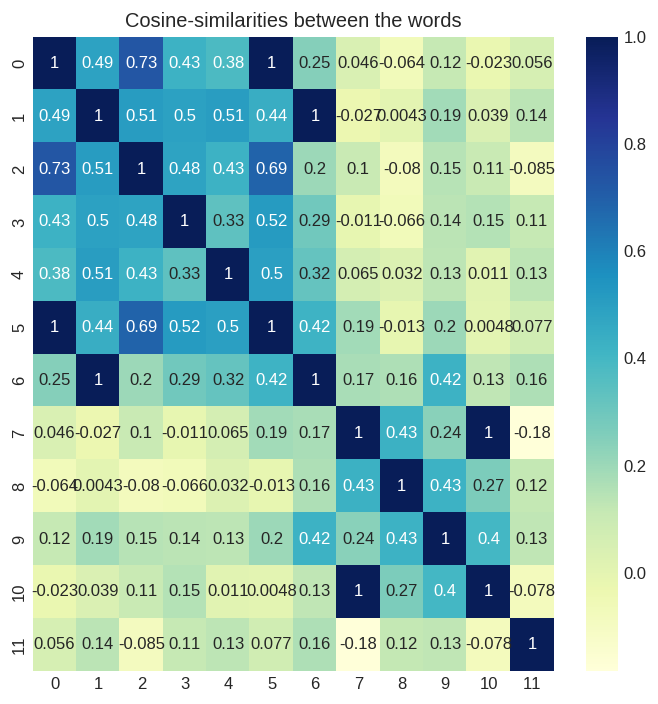

In [128]:
token_similarity_heatmap (TEXT1)

### TASK 9: Bag of Words (BoW)

> Bag of Words (BoW): it converts text into the matrix of occurrence of words within a given document. It focuses on whether given words occurred or not in the document, and it generates a matrix that we might see referred to as a BoW matrix or a document term matrix.

In [68]:
def count_vectorizer (text):

  # preprocess the data
  print(FAIL+":: Filtering the input text by removing the stop words, punctuations and making it lower-case ::"+ENDC)
  text = rm_stop_words (text)

  # create the transform
  vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2), max_df=1.0, min_df=0.02, max_features=None)

  # tokenize and learn the vocabularies from one or two documents.
  vectorizer.fit(text)

  # summarize
  print ("=================================")
  print(OKG+BOLD+"Summary of the vocabulary:"+ENDC+ENDC)
  print ("=================================")
  print (BOLD+"Length of the vocabulary:"+ENDC, len(vectorizer.vocabulary_))
  print(BOLD+"The list of vocabulary:"+ENDC, vectorizer.get_feature_names())
  print(vectorizer.vocabulary_)


  # encode the document. An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.
  vector = vectorizer.transform(text)

  print ("=================================")
  print(OKG+BOLD+"Summarize the encoded vector"+ENDC+ENDC)
  print ("=================================")

	# summarize encoded vector
  print(vector.shape)
  print(vector.toarray())
  print("--------------------------------")

In [91]:
count_vectorizer (TEXT2)

:: Filtering the input text by removing the stop words, punctuations and making it lower-case ::
Total number of filtered words: 25
List of filtered words from the sentence: ['united', 'states', 'america', 'great', 'sustainable', 'country', 'world', 'know', 'society', 'highly', 'socialistic', 'equal', 'good', 'health', 'care', 'system', 'world', 'hardly', 'drive', 'car', 'public', 'transport', 'fantastic', 'hardly', 'pollution']
Summary of the vocabulary:
Length of the vocabulary: 23
The list of vocabulary: ['america', 'car', 'care', 'country', 'drive', 'equal', 'fantastic', 'good', 'great', 'hardly', 'health', 'highly', 'know', 'pollution', 'public', 'socialistic', 'society', 'states', 'sustainable', 'system', 'transport', 'united', 'world']
{'united': 21, 'states': 17, 'america': 0, 'great': 8, 'sustainable': 18, 'country': 3, 'world': 22, 'know': 12, 'society': 16, 'highly': 11, 'socialistic': 15, 'equal': 5, 'good': 7, 'health': 10, 'care': 2, 'system': 19, 'hardly': 9, 'drive': 4,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###TASK 10: TF-IDF (Term Frequency-Inverse Document Frequency)

> A way of normalizing our Bag of Words(BoW) by looking at each word’s frequency in comparison to the document frequency. In other words, it’s a way of representing how important a particular term is in the context of a given document, based on how many times the term appears and how many other documents that same term appears in. The higher the TF-IDF, the more important that term is to that document.


In [103]:
def TFIDF (document, text):
  vectorizer = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')

  #------------ computing and plotting IDF ---------------
  print ("============================================================")
  print(HEAD+BOLD+"Computing Inverse Document Frequency (IDF)"+ENDC+ENDC)
  print ("============================================================")


  print(FAIL+":: Filtering the input text by removing the stop words, punctuations and making it lower-case ::"+ENDC)
  filtered_doc = rm_stop_words (document)

	# tokenize and learn the vocabularies from the document
  vectorizer.fit(filtered_doc)

  # summarize
  print ("=================================")
  print(OKG+BOLD+"Summary of the vocabulary:"+ENDC+ENDC)
  print ("=================================")
  print (BOLD+"Length of the vocabulary:"+ENDC, len(vectorizer.vocabulary_))
  print(BOLD+"The list of vocabulary:"+ENDC, vectorizer.get_feature_names())
  print(vectorizer.vocabulary_)


  print ("=================================")
  print(OKG+BOLD+"IDF of the vocabularies"+ENDC+ENDC)
  print ("=================================")
  print(dict(zip(vectorizer.get_feature_names(), vectorizer.idf_)))

  feature_names = np.array(vectorizer.get_feature_names())
  sorted_by_idf = np.argsort(vectorizer.idf_)

  print("--------------------------------")
  print(OKG+BOLD+"Features with lowest IDF:"+ENDC+ENDC)
  print("--------------------------------")
  print(feature_names[sorted_by_idf[:10]])

  print("--------------------------------")
  print(OKG+BOLD+"Features with highest IDF:"+ENDC+ENDC)
  print("--------------------------------")
  print(feature_names[sorted_by_idf[-10:]])


	#------ plotting inverse document frequency -------
  rr = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

  token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
  token_weight.columns=('token','weight')
  token_weight = token_weight.sort_values(by='weight', ascending=False)

  sns.barplot(x='token', y='weight', data=token_weight)
  plt.title("Inverse Document Frequency (IDF) per token")
  fig=plt.gcf()
  fig.set_size_inches(12,6)
  plt.xticks(rotation=45, ha='right')
  plt.show()

	#---------------------------------------------------

	#---------- testing & computing TF-IDF -------------
  print ("============================================================")
  print(HEAD+BOLD+"Computing Term Frequency Inverse Document Frequency (TF-IDF)"+ENDC+ENDC)
  print ("============================================================")

  print(FAIL+":: Filtering the input text by removing the stop words, punctuations and making it lower-case ::"+ENDC)
  filtered_text = rm_stop_words (text)

	# encode a text after removing stop-words and punctuations
  vector = vectorizer.transform(filtered_text)

	# find maximum value for each of the features over all of dataset:
  max_val = vector.max(axis=0).toarray().ravel()

  print("--------------------------------")
  print(OKG+BOLD+"TF-IDF of the vocabularies"+ENDC+ENDC)
  print("--------------------------------")
  print(dict(zip(vectorizer.get_feature_names(), max_val)))


	#sort weights from smallest to biggest and extract their indices
  sort_by_tfidf = max_val.argsort()

  print("--------------------------------")
  print(OKG+BOLD+"Features with lowest TF-IDF:"+ENDC+ENDC)
  print("--------------------------------")
  print(feature_names[sort_by_tfidf[:10]])

  print("--------------------------------")
  print(OKG+BOLD+"Features with highest TF-IDF:"+ENDC+ENDC)
  print("--------------------------------")
  print(feature_names[sort_by_tfidf[-10:]])

	#------ plotting term frequency inverse document frequency (TF-IDF) -------

  rr1 = dict(zip(vectorizer.get_feature_names(), max_val))

  token_weight = pd.DataFrame.from_dict(rr1, orient='index').reset_index()

  token_weight.columns=('token','weight')
  token_weight = token_weight.sort_values(by='weight', ascending=False)

  sns.barplot(x='token', y='weight', data=token_weight)
  plt.title("Term Frequency-Inverse Document Frequency (TF-IDF) per token")
  fig=plt.gcf()
  fig.set_size_inches(10,5)
  plt.xticks(rotation=45, ha='right')
  plt.show()

In [100]:
document = "The BLOOM model has been proposed with its various versions through the BigScience Workshop. BigScience is inspired by other open science initiatives where researchers have pooled their time and resources to collectively achieve a higher impact. The architecture of BLOOM is essentially similar to GPT3 (auto-regressive model for next token prediction), but has been trained on different 46 languages including code. Several smaller versions of the models have been trained on the same dataset."

In [101]:
text = "This is the configuration class to store the configuration of a BloomModel. It is used to instantiate a Bloom model according to the specified arguments, defining the model architecture. Instantiating a configuration with the defaults will yield a similar configuration to the Bloom architecture bigscience/bloom."

Computing Inverse Document Frequency (IDF)
:: Filtering the input text by removing the stop words, punctuations and making it lower-case ::
Total number of filtered words: 40
List of filtered words from the sentence: ['bloom', 'model', 'propose', 'version', 'bigscience', 'workshop', 'bigscience', 'inspire', 'open', 'science', 'initiative', 'researcher', 'pool', 'time', 'resource', 'collectively', 'achieve', 'high', 'impact', 'architecture', 'bloom', 'essentially', 'similar', 'gpt3', 'auto', 'regressive', 'model', 'token', 'prediction', 'train', 'different', '46', 'language', 'include', 'code', 'small', 'version', 'model', 'train', 'dataset']
Summary of the vocabulary:
Length of the vocabulary: 34
The list of vocabulary: ['46', 'achieve', 'architecture', 'auto', 'bigscience', 'bloom', 'code', 'collectively', 'dataset', 'different', 'essentially', 'gpt3', 'high', 'impact', 'include', 'initiative', 'inspire', 'language', 'model', 'open', 'pool', 'prediction', 'propose', 'regressive', 'res

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


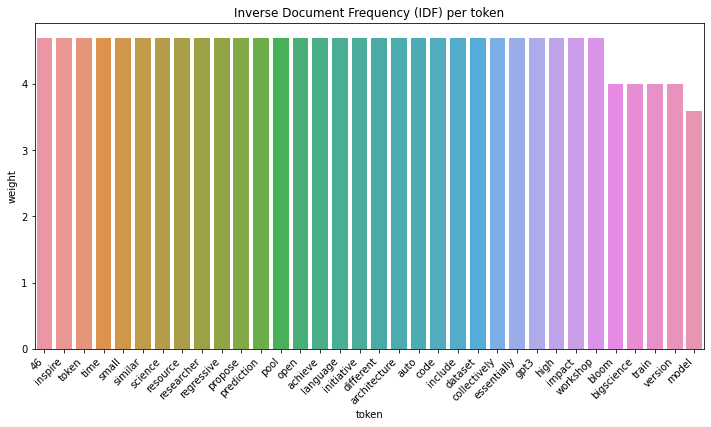

Computing Term Frequency Inverse Document Frequency (TF-IDF)
:: Filtering the input text by removing the stop words, punctuations and making it lower-case ::
Total number of filtered words: 25
List of filtered words from the sentence: ['configuration', 'class', 'store', 'configuration', 'bloommodel', 'use', 'instantiate', 'bloom', 'model', 'accord', 'specify', 'argument', 'define', 'model', 'architecture', 'instantiate', 'configuration', 'default', 'yield', 'similar', 'configuration', 'bloom', 'architecture', 'bigscience', 'bloom']
--------------------------------
TF-IDF of the vocabularies
--------------------------------
{'46': 0.0, 'achieve': 0.0, 'architecture': 4.688879454113936, 'auto': 0.0, 'bigscience': 3.995732273553991, 'bloom': 3.995732273553991, 'code': 0.0, 'collectively': 0.0, 'dataset': 0.0, 'different': 0.0, 'essentially': 0.0, 'gpt3': 0.0, 'high': 0.0, 'impact': 0.0, 'include': 0.0, 'initiative': 0.0, 'inspire': 0.0, 'language': 0.0, 'model': 3.5902671654458267, 'open'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


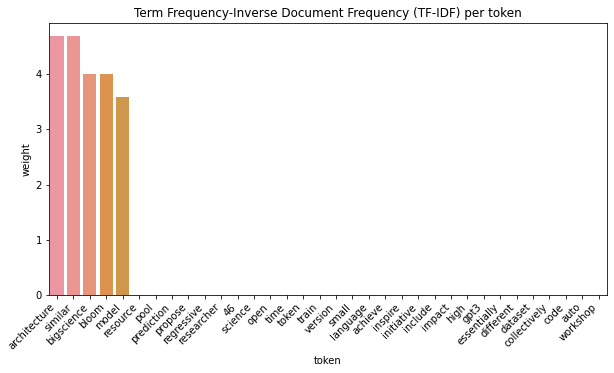

In [104]:
TFIDF (document, text)

### TASK 11: Word2Vec, Sentence2Vec & PCA

> PCA is a linear feature extraction technique. It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. It does so by calculating the eigenvectors from the covariance matrix. The eigenvectors that correspond to the largest eigenvalues (the principal components) are used to reconstruct a significant fraction of the variance of the original data.


In [141]:
def PCA_model (text):

  from sklearn.decomposition import PCA
  pca = PCA(n_components=2)

  # remove stop words, punctuations
  filtered_sentence = rm_stop_words (text)
  doc = " ".join(str(x) for x in filtered_sentence)

  # Word2Vec & PCA
  word_vector = [nlp(word).vector for word in doc]
  pca.fit(word_vector)
  word_vecs_2d = pca.transform(word_vector)

  #plotting the PCA
  plt.figure(figsize=(8, 5), dpi=120)
  plt.title("Principle Component Analysis (PCA) of Word2Vec\n", fontsize=12)
  plt.style.use('seaborn-whitegrid')
  plt.xlabel('pc1', fontsize=15)
  plt.ylabel('pc2', fontsize=15)

  print ("=======================================")
  print(HEAD+BOLD+"PCA coordinates of the words"+ENDC+ENDC)
  print ("=======================================")

	# plot the scatter plot of where the words will be after PCA
	# for each word and coordinate pair: draw the text on the plot
  for word, coord in zip(filtered_sentence, word_vecs_2d):
    x, y = coord
    plt.scatter(x, y, marker='o', c='g', alpha=0.3, cmap='viridis')
    print (OKG+word+ENDC, "--->", x, "," , y)
    plt.text(x, y, word)

	#-----------------------------------------

	# Sentence2Vec & PCA
  sent_vector = [nlp(sentence.text).vector for sentence in nlp(text).sents]
  pca.fit(sent_vector)
  sent_vecs_2d = pca.transform(sent_vector)

  # plots
  plt.figure(figsize=(8, 5), dpi=120)
  plt.title("Principle Component Analysis (PCA) of Sentence2Vec\n", fontsize=12)
  plt.style.use('seaborn-whitegrid')
  plt.xlabel('pc1', fontsize=15)
  plt.ylabel('pc2', fontsize=15)

	# plot the scatter plot of where the sentences will be after PCA
	# and for each sentence and the coordinate pair: draw the text on the plot

  print ("=======================================")
  print(HEAD+BOLD+"PCA coordinates of the sentences"+ENDC+ENDC)
  print ("=======================================")

  N=0
  for sentence, coord in zip(nlp(text).sents, sent_vecs_2d):
    N += 1
    x, y = coord
    plt.scatter(x, y, marker='o', c='g', alpha=0.3, cmap='viridis')
    print (FAIL+sentence.text+ENDC, "---> ", x, ",", y)
    plt.text(x, y, sentence.text)

	# cosine similarities between sentences
  sent_similar = np.array([sent1.similarity(sent2) for sent2 in nlp(text).sents for sent1 in nlp(text).sents]).reshape(N, -1)

  # heatmap of the cosine-similarities b/w sentences
  plt.figure(figsize=(5, 5), dpi=120)
  plt.title("Cosine-similarities between the sentences\n", fontsize=12)
  sns.heatmap(sent_similar, annot=True, cmap="YlGnBu")
  plt.show()

Total number of filtered words: 12
List of filtered words from the sentence: ['world', 'advent', 'internet', 'revolution', 'digital', 'world', 'advent', 'ai', 'think', 'find', 'ai', 'revolutionary']
PCA coordinates of the words
world ---> -1.5480815729911952 , -2.458128679363795
advent ---> -0.9878283405564469 , -1.317167298824926
internet ---> -1.0846935779388267 , -1.7878347243623798
revolution ---> -1.718223895712247 , -0.9033531158544374
digital ---> -3.2365214552476296 , -0.046399124782238545
world ---> 12.202085174757189 , 0.5410907512569042
advent ---> -1.8862566197087756 , 0.028382523186263896
ai ---> -3.2365214552476296 , -0.046399124782238545
think ---> -3.502260954820307 , -1.0569580181379077
find ---> -1.4812946296976586 , -1.564719608327246
ai ---> -1.567106647798216 , -3.703662013821863
revolutionary ---> -1.3539134616329782 , -2.0425356786410296
PCA coordinates of the sentences
The world has never been the same since the advent of the internet. --->  -2.075311959843429 ,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.


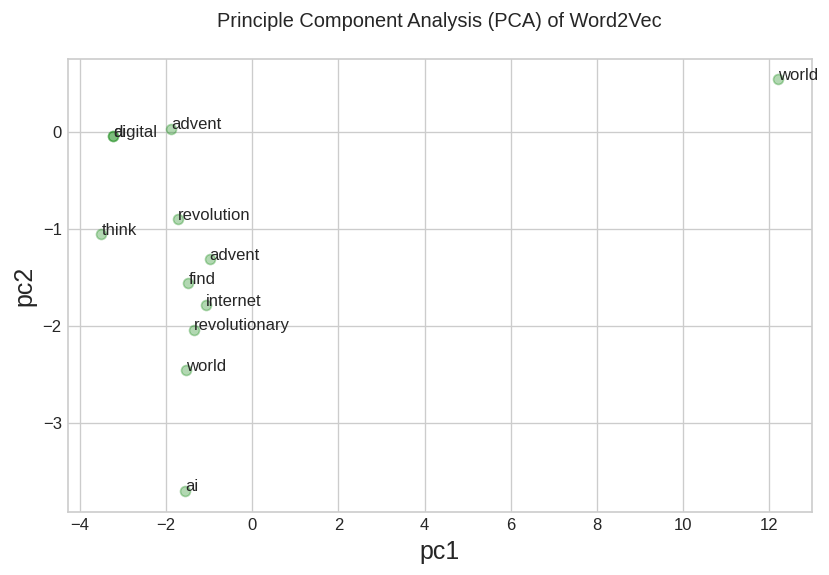

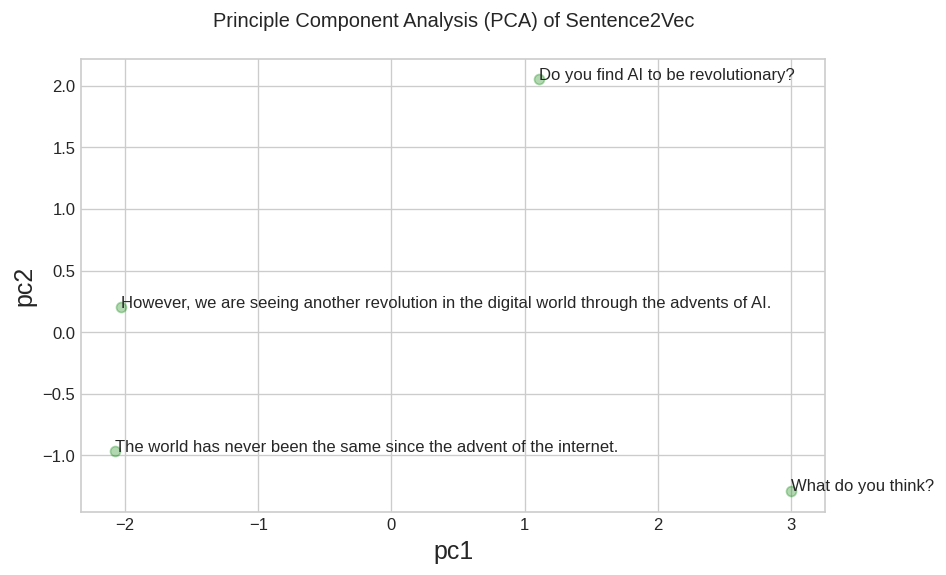

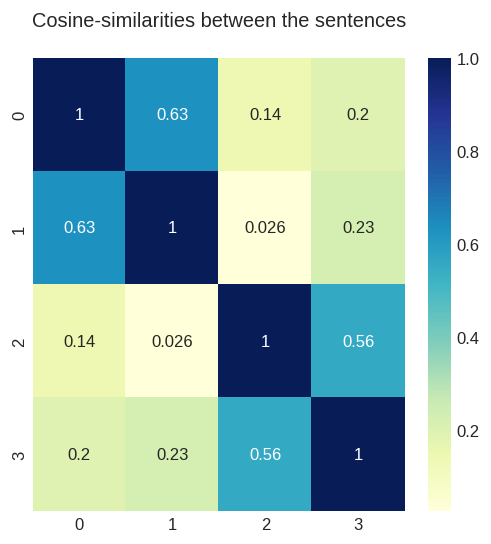

In [142]:
PCA_model (TEXT1)